# SPAM SMS DETECTION

In [1]:
import numpy as np
import pandas as pd
import string
import nltk
import seaborn as sns

## LOADING DATA

In [2]:
# normal reading method does not work because this file uesd 'Windows-1252' encodindg inatead of utf-8 
# df = pd.read_csv('spam.csv')

In [3]:
import chardet

with open('spam.csv', 'rb') as filedata:
    result = chardet.detect(filedata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [4]:
df = pd.read_csv('spam.csv', encoding='Windows-1252')


In [5]:
df.sample(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2179,ham,And popping &lt;#&gt; ibuprofens was no help.,NaN,NaN,NaN
5311,ham,K.k:)i'm going to tirunelvali this week to see...,NaN,NaN,NaN
18,ham,Fine if thatåÕs the way u feel. ThatåÕs the wa...,NaN,NaN,NaN


## ADJUSTING DATASET

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis =1)


In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.rename(columns={'v1':'target','v2':'data'},inplace=True)

In [10]:
df.head()

,target,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### ENCODING TARGET COLUMN

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isnull().sum()

target    0
data      0
dtype: int64

In [15]:
df.duplicated().sum()


403

In [16]:
df = df.drop_duplicates(keep='first')


In [17]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

## DATA VISUALISATION

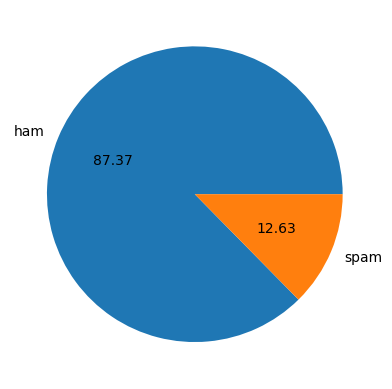

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
df['num_characters'] = df['data'].apply(len)

In [20]:
df.head()

,target,data,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
df['num_words'] = df['data'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head()

,target,data,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


<Axes: xlabel='num_characters', ylabel='Count'>

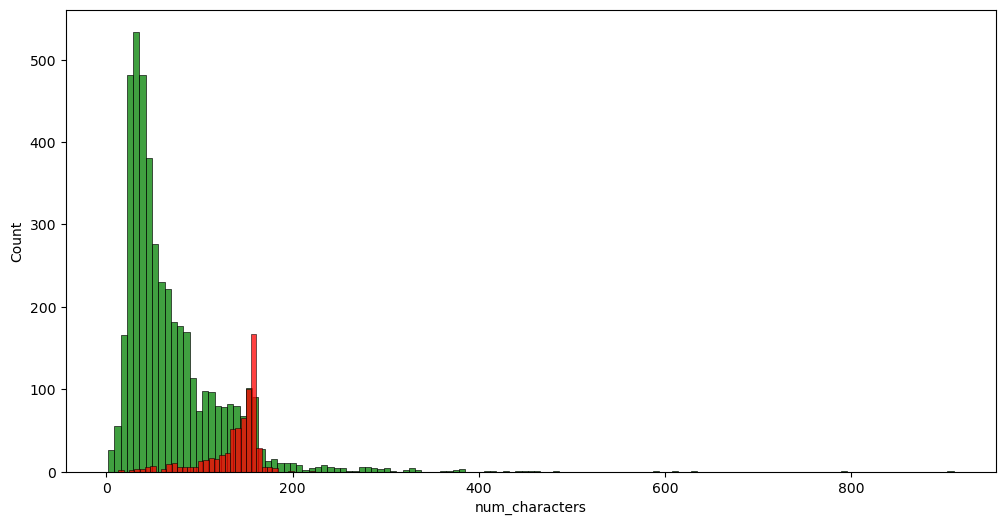

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'],color = 'green')
sns.histplot(df[df['target'] == 1]['num_characters'],color='RED')


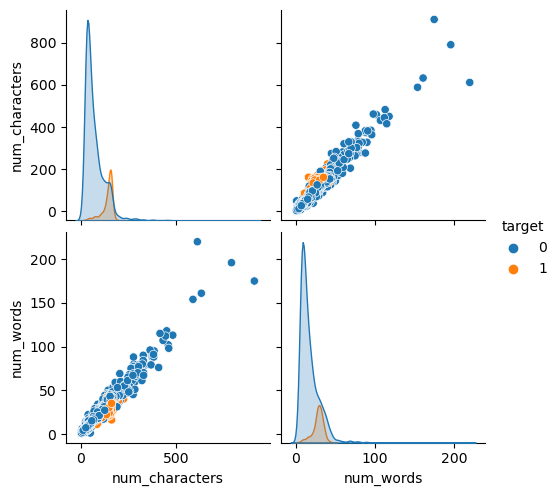

In [24]:
sns.pairplot(df,hue='target')

In [25]:
df['process_data']=df['data']

In [26]:
df['process_data'] = df['process_data'].str.lower()

In [27]:
df.head()

,target,data,num_characters,num_words,process_data
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"go until jurong point, crazy.. available only ..."
1,0,Ok lar... Joking wif u oni...,29,8,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,u dun say so early hor... u c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"nah i don't think he goes to usf, he lives aro..."


# PREPROCESSING DATASET 

In [28]:
exclude = string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
def remove_punc1(text):
    return text.translate(str.maketrans('','',exclude))

In [30]:
df['process_data']=df['process_data'].apply(remove_punc1)

In [31]:
df.head()

,target,data,num_characters,num_words,process_data
0,0,"Go until jurong point, crazy.. Available only ...",111,24,go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,29,8,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,nah i dont think he goes to usf he lives aroun...


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   target          5169 non-null   int32 
 1   data            5169 non-null   object
 2   num_characters  5169 non-null   int64 
 3   num_words       5169 non-null   int64 
 4   process_data    5169 non-null   object
dtypes: int32(1), int64(2), object(2)
memory usage: 222.1+ KB


#### ADDING NEW INDEX

In [33]:
list = []
for i in range(5169):
    list.append(i)

In [34]:
df['index']=list

In [35]:
df.head()

,target,data,num_characters,num_words,process_data,index
0,0,"Go until jurong point, crazy.. Available only ...",111,24,go until jurong point crazy available only in ...,0
1,0,Ok lar... Joking wif u oni...,29,8,ok lar joking wif u oni,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,free entry in 2 a wkly comp to win fa cup fina...,2
3,0,U dun say so early hor... U c already then say...,49,13,u dun say so early hor u c already then say,3
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,nah i dont think he goes to usf he lives aroun...,4


In [36]:
# df['data'][102]

In [37]:
df.set_index("index", inplace = True)

In [38]:
df.head()

,target,data,num_characters,num_words,process_data
index,,,,,
0,0,"Go until jurong point, crazy.. Available only ...",111,24,go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,29,8,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,nah i dont think he goes to usf he lives aroun...


### WORD TOKENIZING

In [39]:
for i in range(5169):
  s=df['process_data'][i]
  df['process_data'][i] = nltk.word_tokenize(s)

C:\Users\kaush\AppData\Local\Temp\ipykernel_6792\3751508463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['process_data'][i] = nltk.word_tokenize(s)


In [40]:
df.head()

,target,data,num_characters,num_words,process_data
index,,,,,
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[go, until, jurong, point, crazy, available, o..."
1,0,Ok lar... Joking wif u oni...,29,8,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,U dun say so early hor... U c already then say...,49,13,"[u, dun, say, so, early, hor, u, c, already, t..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [41]:
y = []
for j in range(5169):
  for i in df['process_data'][j]:
      if i.isalnum():
        y.append(i)
  df['process_data'][j] = y[:]
  y.clear()

C:\Users\kaush\AppData\Local\Temp\ipykernel_6792\61347679.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['process_data'][j] = y[:]


In [42]:
df.sample(5)

,target,data,num_characters,num_words,process_data
index,,,,,
4319,0,"Received, understood n acted upon!",34,7,"[received, understood, n, acted, upon]"
478,1,FREE MESSAGE Activate your 500 FREE Text Messa...,146,24,"[free, message, activate, your, 500, free, tex..."
3357,0,No da. . Vijay going to talk in jaya tv,39,11,"[no, da, vijay, going, to, talk, in, jaya, tv]"
4436,0,Ok lor... Or u wan me go look 4 u?,34,12,"[ok, lor, or, u, wan, me, go, look, 4, u]"
1076,0,"Yeah go on then, bored and depressed sittin wa...",105,22,"[yeah, go, on, then, bored, and, depressed, si..."


In [43]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### REMOVING STOPWORDS

In [44]:
y = []
for j in range(5169):
  for i in df['process_data'][j]:
      if i not in stopwords.words('english') :
            y.append(i)
  df['process_data'][j] = y[:]
  y.clear()

C:\Users\kaush\AppData\Local\Temp\ipykernel_6792\880795094.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['process_data'][j] = y[:]


In [45]:
df.head()

,target,data,num_characters,num_words,process_data
index,,,,,
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,29,8,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[nah, dont, think, goes, usf, lives, around, t..."


### STEMMING

In [46]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [47]:
for j in range(5169):
  for i in df['process_data'][j]:
       y.append(ps.stem(i))
  df['process_data'][j] = " ".join(y)
  y.clear()

C:\Users\kaush\AppData\Local\Temp\ipykernel_6792\221755617.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['process_data'][j] = " ".join(y)


In [48]:
df.head()

,target,data,num_characters,num_words,process_data
index,,,,,
0,0,"Go until jurong point, crazy.. Available only ...",111,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,nah dont think goe usf live around though


In [49]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='red')

In [50]:
spam_wc = wc.generate(df[df['target'] == 1]['process_data'].str.cat(sep=" "))

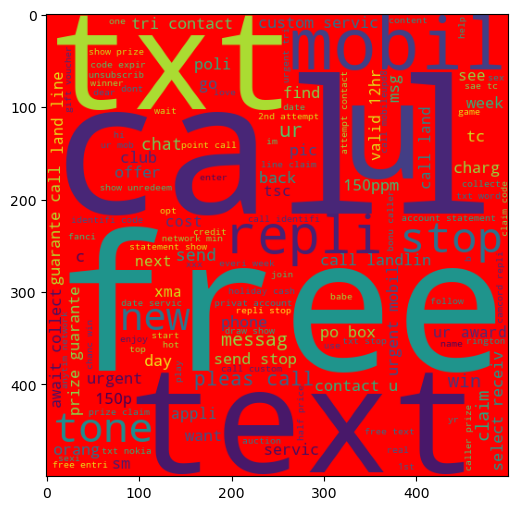

In [51]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [52]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='green')

In [53]:
ham_wc = wc.generate(df[df['target'] == 0]['process_data'].str.cat(sep=" "))

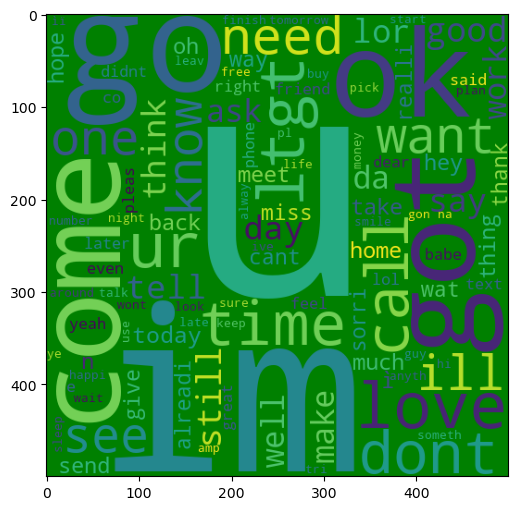

In [54]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

## APLLYING TF-IDF

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)


In [56]:
X = tfidf.fit_transform(df['process_data']).toarray()

In [57]:
X.shape

(5169, 3000)

In [58]:
y = df['target'].values

### TRAIN TEST SPLIT

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

## MODEL SELECTION - I

In [61]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [62]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [63]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [64]:
list1 =[]
list2=[]
list3 = []
list4 = []

In [65]:
model1 =  LogisticRegression()
model2 = MultinomialNB()
model3 = SVC()

## LOGISTIC REGRESSION

In [66]:
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(f"\n Accuaracy: {accuracy_score(y_test, y_pred1)}")
print(f"\n Precision: {precision_score(y_test, y_pred1)}")
print(f"\n Recall: {recall_score(y_test, y_pred1)}")
print(f"\n F1 Score: {f1_score(y_test, y_pred1)}")
list1.append(accuracy_score(y_test, y_pred1))
list2.append(precision_score(y_test, y_pred1))
list3.append(recall_score(y_test, y_pred1))
list4.append(f1_score(y_test, y_pred1))


 Accuaracy: 0.9526112185686654

 Precision: 0.968421052631579

 Recall: 0.6666666666666666

 F1 Score: 0.7896995708154506


## NAIVE BAYES

In [67]:
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(f"\n Accuaracy: {accuracy_score(y_test, y_pred2)}")
print(f"\n Precision: {precision_score(y_test, y_pred2)}")
print(f"\n Recall: {recall_score(y_test, y_pred2)}")
print(f"\n F1 Score: {f1_score(y_test, y_pred2)}")
list1.append(accuracy_score(y_test, y_pred2))
list2.append(precision_score(y_test, y_pred2))
list3.append(recall_score(y_test, y_pred2))
list4.append(f1_score(y_test, y_pred2))


 Accuaracy: 0.9748549323017408

 Precision: 1.0

 Recall: 0.8115942028985508

 F1 Score: 0.896


## SUPPORT VECTOR MACHINE

In [68]:
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(f"\n Accuaracy: {accuracy_score(y_test, y_pred3)}")
print(f"\n Precision: {precision_score(y_test, y_pred3)}")
print(f"\n Recall: {recall_score(y_test, y_pred3)}")
print(f"\n F1 Score: {f1_score(y_test, y_pred3)}")
list1.append(accuracy_score(y_test, y_pred3))
list2.append(precision_score(y_test, y_pred3))
list3.append(recall_score(y_test, y_pred3))
list4.append(f1_score(y_test, y_pred3))


 Accuaracy: 0.9690522243713733

 Precision: 0.9732142857142857

 Recall: 0.7898550724637681

 F1 Score: 0.872


## OVER_SAMPLING

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
df.head()

,target,data,num_characters,num_words,process_data
index,,,,,
0,0,"Go until jurong point, crazy.. Available only ...",111,24,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,nah dont think goe usf live around though


In [71]:
X = tfidf.fit_transform(df['process_data']).toarray()
y=df['target']

In [72]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

## MODEL SELETION II

In [74]:
model4 =  LogisticRegression()
model5 = MultinomialNB()
model6 = SVC()

## LOGISTIC REGRESSION

In [75]:
model4.fit(X_train, y_train)
y4 = model4.predict(X_test)
print(f"\n Accuaracy: {accuracy_score(y_test, y4)}")
print(f"\n Precision: {precision_score(y_test, y4)}")
print(f"\n Recall: {recall_score(y_test, y4)}")
print(f"\n F1 Score: {f1_score(y_test, y4)}")
list1.append(accuracy_score(y_test, y4))
list2.append(precision_score(y_test, y4))
list3.append(recall_score(y_test, y4))
list4.append(f1_score(y_test, y4))


 Accuaracy: 0.9463198671831765

 Precision: 0.9780092592592593

 Recall: 0.9154929577464789

 F1 Score: 0.9457190822607723


## NAIVE BAYES

In [76]:
model5.fit(X_train, y_train)
y5 = model5.predict(X_test)
print(f"\n Accuaracy: {accuracy_score(y_test, y5)}")
print(f"\n Precision: {precision_score(y_test, y5)}")
print(f"\n Recall: {recall_score(y_test, y5)}")
print(f"\n F1 Score: {f1_score(y_test, y5)}")
list1.append(accuracy_score(y_test, y5))
list2.append(precision_score(y_test, y5))
list3.append(recall_score(y_test, y5))
list4.append(f1_score(y_test, y5))


 Accuaracy: 0.9723298284449363

 Precision: 0.9729144095341279

 Recall: 0.9729144095341279

 F1 Score: 0.9729144095341279


## SUPPORT VECTOR MACHINE

In [77]:
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
print(f"\n Accuaracy: {accuracy_score(y_test, y_pred6)}")
print(f"\n Precision: {precision_score(y_test, y_pred6)}")
print(f"\n Recall: {recall_score(y_test, y_pred6)}")
print(f"\n F1 Score: {f1_score(y_test, y_pred6)}")
list1.append(accuracy_score(y_test, y_pred6))
list2.append(precision_score(y_test, y_pred6))
list3.append(recall_score(y_test, y_pred6))
list4.append(f1_score(y_test, y_pred6))


 Accuaracy: 0.9950193691200886

 Precision: 0.9945887445887446

 Recall: 0.9956663055254604

 F1 Score: 0.9951272333513805


In [78]:
model_list=['LR','mnb','svc','LR','mnb','svc']

In [79]:
balanced = ['NO','NO','NO','YES','YES','YES']

In [80]:
dict = {'model':model_list,'Accuracy':list1,'Precision':list2,'Recall':list3,'F1 Score':list4,'Balance':balanced}

In [81]:
df2=pd.DataFrame(dict)

## COMPARISION

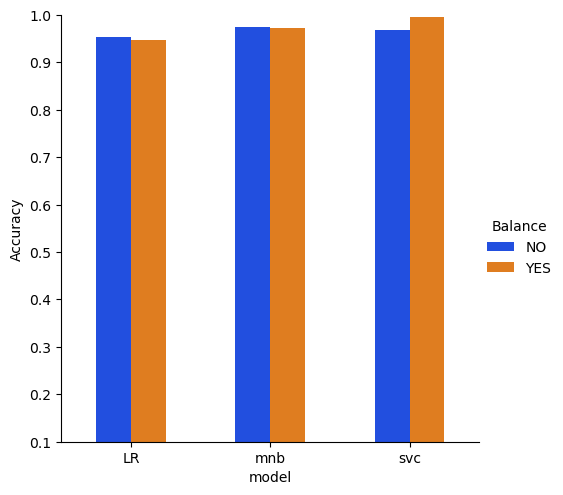

In [82]:
sns.catplot(x="model",y="Accuracy",data=df2,kind='bar',height=5,width=0.5,hue='Balance',palette='bright')
plt.ylim(0.1,1)

plt.show()

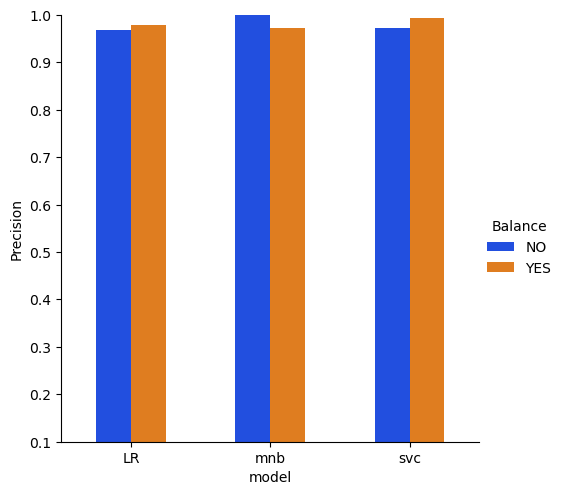

In [83]:
sns.catplot(x="model",y="Precision",data=df2,kind='bar',height=5,width=0.5,hue='Balance',palette='bright')
plt.ylim(0.1,1)
plt.show()

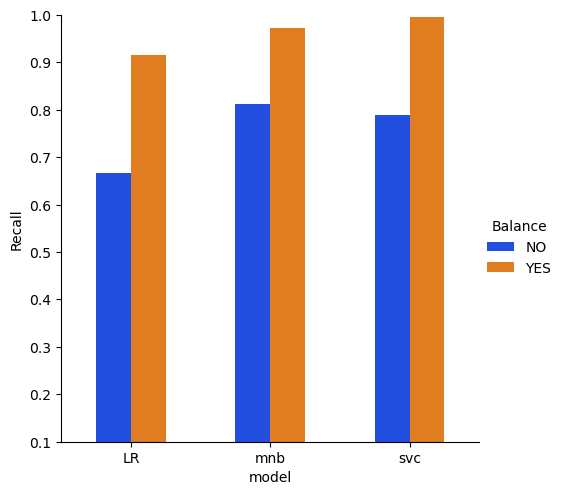

In [84]:
sns.catplot(x="model",y="Recall",data=df2,kind='bar',height=5,width=0.5,hue='Balance',palette='bright')
plt.ylim(0.1,1)
plt.show()

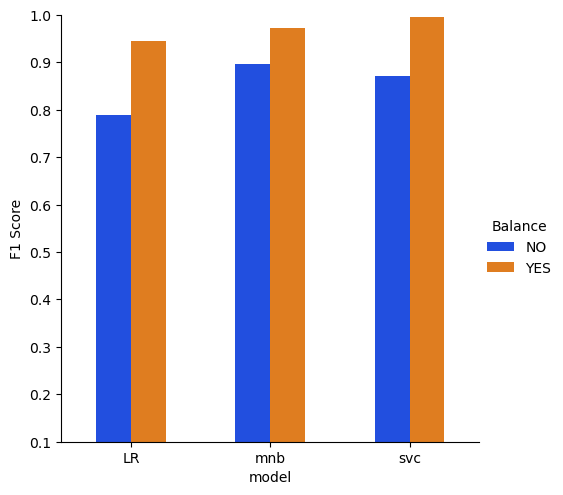

In [85]:
sns.catplot(x="model",y="F1 Score",data=df2,kind='bar',height=5,width=0.5,hue='Balance',palette='bright')
plt.ylim(0.1,1)
plt.show()